In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [4]:
# Column names as per UCI dataset
columns = ['letter', 'x-box', 'y-box', 'width', 'high', 'onpix', 'x-bar',
           'y-bar', 'x2bar', 'y2bar', 'xybar', 'x2ybr', 'xy2br', 'x-ege', 'xegvy', 'y-ege', 'yegvx']

In [5]:
# Load the dataset locally (ensure 'letter-recognition.data' is in the same directory)
df = pd.read_csv("letter-recognition.data", names=columns)


In [7]:
# Display first few rows
print("Sample Data:")
print(df.head())

Sample Data:
  letter  x-box  y-box  width  high  onpix  x-bar  y-bar  x2bar  y2bar  xybar  \
0      T      2      8      3     5      1      8     13      0      6      6   
1      I      5     12      3     7      2     10      5      5      4     13   
2      D      4     11      6     8      6     10      6      2      6     10   
3      N      7     11      6     6      3      5      9      4      6      4   
4      G      2      1      3     1      1      8      6      6      6      6   

   x2ybr  xy2br  x-ege  xegvy  y-ege  yegvx  
0     10      8      0      8      0      8  
1      3      9      2      8      4     10  
2      3      7      3      7      3      9  
3      4     10      6     10      2      8  
4      5      9      1      7      5     10  


In [8]:
# Encode target labels (A-Z) to numbers (0–25)
label_encoder = LabelEncoder()
df['letter_encoded'] = label_encoder.fit_transform(df['letter'])

In [9]:
# Features and target
X = df.drop(['letter', 'letter_encoded'], axis=1)
y = df['letter_encoded']

In [10]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Normalize features
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [12]:
# Build Deep Neural Network
model = Sequential([
    Dense(128, input_shape=(16,), activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(26, activation='softmax')  # 26 classes (A-Z)
])

C:\Users\Nandini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
# Train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=64,
                    validation_split=0.2, verbose=1)


Epoch 1/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0864 - loss: 3.1794 - val_accuracy: 0.3472 - val_loss: 2.4770
Epoch 2/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.2993 - loss: 2.3807 - val_accuracy: 0.5406 - val_loss: 1.7720
Epoch 3/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4183 - loss: 1.8912 - val_accuracy: 0.5769 - val_loss: 1.5243
Epoch 4/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4775 - loss: 1.6720 - val_accuracy: 0.6409 - val_loss: 1.3711
Epoch 5/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5229 - loss: 1.5451 - val_accuracy: 0.6541 - val_loss: 1.2785
Epoch 6/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5524 - loss: 1.4520 - val_accuracy: 0.6737 - val_loss: 1.1802
Epoch 7/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5781 - loss: 1.3585 - val_accuracy: 0.6916 - val_loss: 1.1169
Epoch 8/30
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6056 - loss: 1.2862 - val_accuracy: 0.

In [15]:
# Evaluate on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_acc:.4f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8158 - loss: 0.5991

 Test Accuracy: 0.8150


In [16]:
# Predict
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [17]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))



Classification Report:
              precision    recall  f1-score   support

           A       0.86      0.97      0.91       149
           B       0.73      0.84      0.78       153
           C       0.97      0.69      0.81       137
           D       0.87      0.79      0.83       156
           E       0.81      0.67      0.73       141
           F       0.82      0.81      0.81       140
           G       0.68      0.81      0.74       160
           H       0.70      0.58      0.63       144
           I       0.97      0.79      0.87       146
           J       0.92      0.83      0.87       149
           K       0.73      0.75      0.74       130
           L       0.93      0.82      0.87       155
           M       0.87      0.90      0.89       168
           N       0.90      0.82      0.86       151
           O       0.73      0.85      0.78       145
           P       0.97      0.81      0.88       173
           Q       0.74      0.86      0.80       166
   

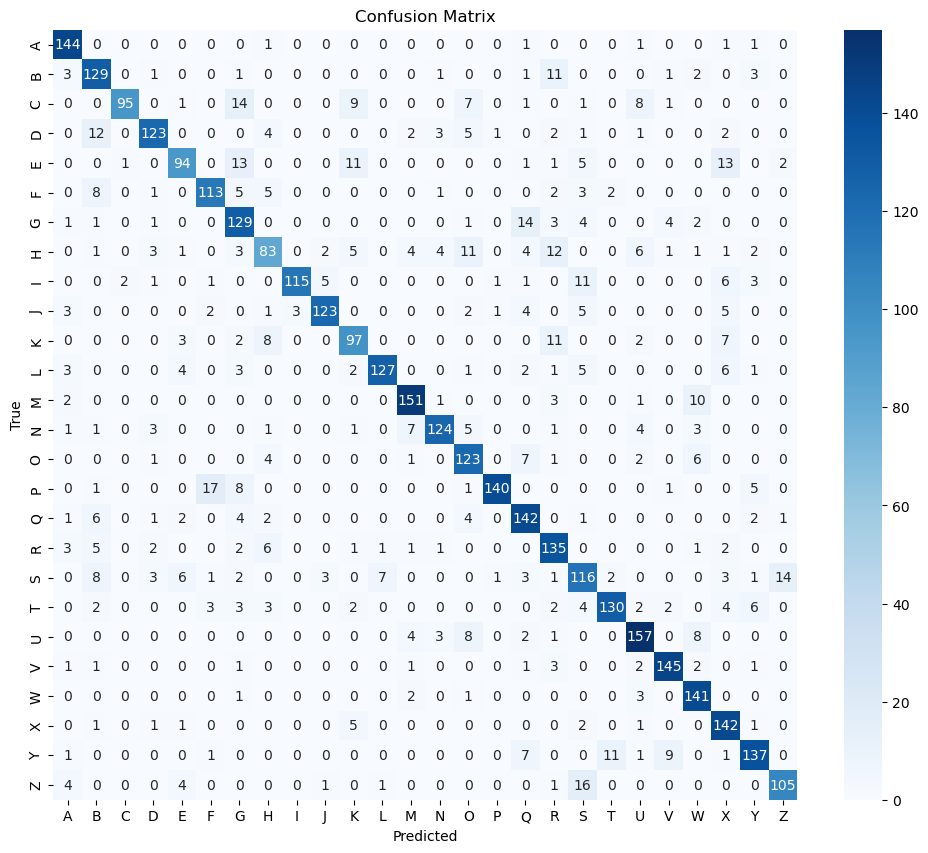

In [19]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)

# Plot Confusion Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


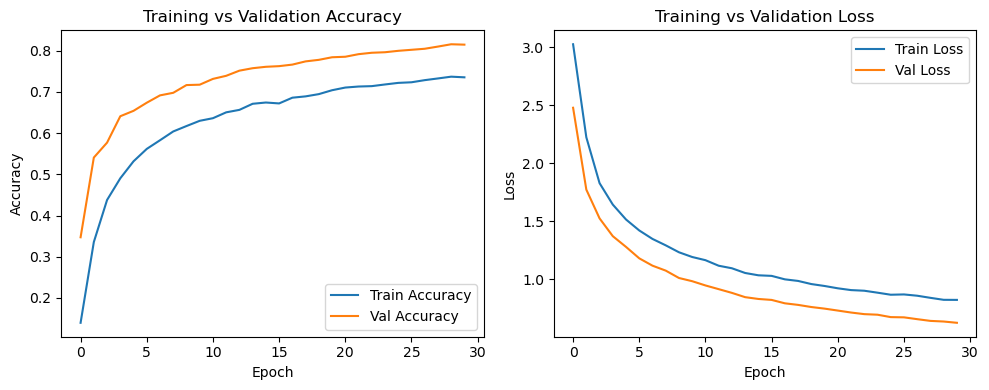

In [20]:
# Plot training & validation accuracy and loss
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.array(y_test)


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [22]:
# Decode numerical predictions back to actual letters
predicted_letters = label_encoder.inverse_transform(y_pred_classes)
true_letters = label_encoder.inverse_transform(y_true_classes)


In [23]:
print("\n Sample Predictions vs Actual:\n")
for i in range(10):
    print(f"Actual: {true_letters[i]}  ➡️  Predicted: {predicted_letters[i]}")



 Sample Predictions vs Actual:

Actual: T  ➡️  Predicted: X
Actual: L  ➡️  Predicted: X
Actual: A  ➡️  Predicted: A
Actual: E  ➡️  Predicted: E
Actual: Q  ➡️  Predicted: Q
Actual: E  ➡️  Predicted: E
Actual: O  ➡️  Predicted: O
Actual: Q  ➡️  Predicted: Q
Actual: G  ➡️  Predicted: G
Actual: O  ➡️  Predicted: O


In [24]:
correct_preds = np.sum(predicted_letters == true_letters)
total_preds = len(true_letters)
accuracy_check = correct_preds / total_preds

print(f"\n Letter-wise Match Accuracy: {accuracy_check:.4f} ({correct_preds}/{total_preds} correct)")



 Letter-wise Match Accuracy: 0.8150 (3260/4000 correct)


C:\Users\Nandini\AppData\Local\Temp\ipykernel_29156\96676351.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=["Correct", "Incorrect"], y=[correct_counts, incorrect_counts], palette="viridis")


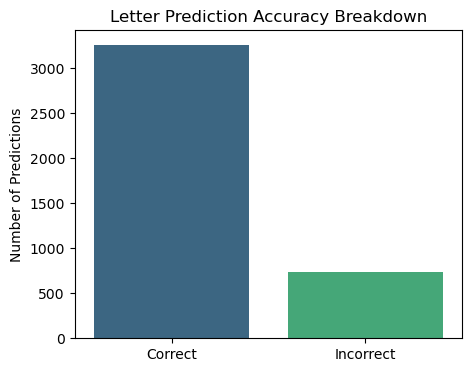

In [25]:
correct = predicted_letters == true_letters
correct_counts = np.sum(correct)
incorrect_counts = len(correct) - correct_counts

plt.figure(figsize=(5, 4))
sns.barplot(x=["Correct", "Incorrect"], y=[correct_counts, incorrect_counts], palette="viridis")
plt.title("Letter Prediction Accuracy Breakdown")
plt.ylabel("Number of Predictions")
plt.show()


In [ ]:
Binary Classification


In [26]:
pip install tensorflow matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from wordcloud import WordCloud

In [4]:
# Step 1: Load Dataset
vocab_size = 10000  # top 10,000 words
max_length = 200    # truncate/pad reviews to 200 words
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

In [5]:
# Step 2: Pad Sequences
x_train = pad_sequences(x_train, maxlen=max_length)
x_test = pad_sequences(x_test, maxlen=max_length)

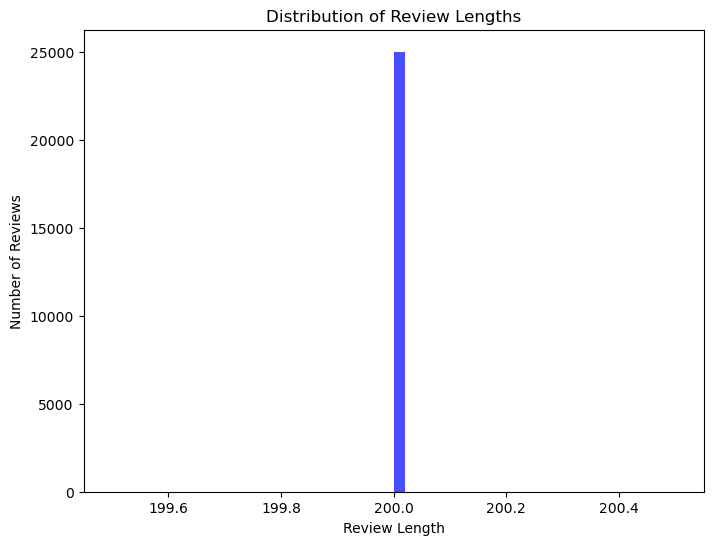

In [6]:
# Visualize the distribution of review lengths
review_lengths = [len(review) for review in x_train]
plt.figure(figsize=(8,6))
plt.hist(review_lengths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Review Lengths')
plt.xlabel('Review Length')i ca
plt.ylabel('Number of Reviews')
plt.show()

In [7]:
# Build the model
model = Sequential([
    Embedding(vocab_size, 32, input_length=max_length),
    Bidirectional(LSTM(64, dropout=0.2, recurrent_dropout=0.2)),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


C:\Users\Nandini\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [8]:
# Early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)


In [9]:
# Step 5: Train Model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 402ms/step - accuracy: 0.6290 - loss: 0.6213 - val_accuracy: 0.7982 - val_loss: 0.4257
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 123s 395ms/step - accuracy: 0.8500 - loss: 0.3564 - val_accuracy: 0.8424 - val_loss: 0.3856
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 128s 409ms/step - accuracy: 0.8672 - loss: 0.3236 - val_accuracy: 0.8422 - val_loss: 0.3801
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 126s 401ms/step - accuracy: 0.8903 - loss: 0.2774 - val_accuracy: 0.8380 - val_loss: 0.3907
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 125s 398ms/step - accuracy: 0.9005 - loss: 0.2594 - val_accuracy: 0.8404 - val_loss: 0.4004


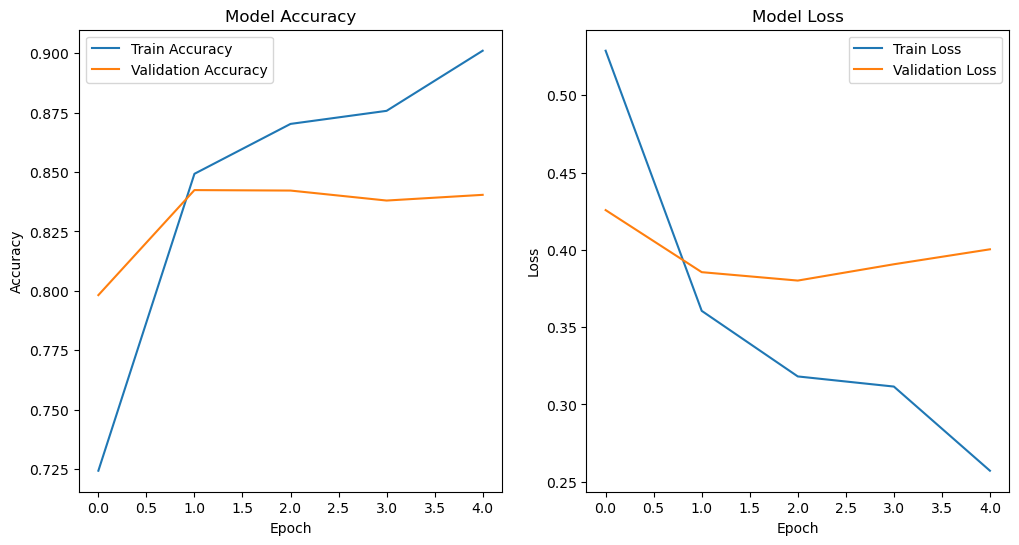

In [10]:
# Step 7: Plot Accuracy and Loss
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [12]:
# Load the word index to decode the reviews
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

In [13]:
# Function to decode integer review to words
def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

In [14]:
# Decode a sample of reviews from training data
decoded_reviews = [decode_review(review) for review in x_train[:1000]]  # limit to 1000 reviews for performance
all_reviews = ' '.join(decoded_reviews)

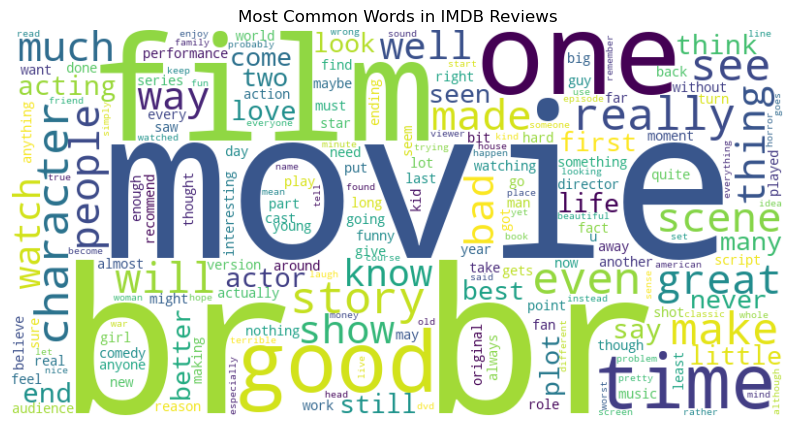

In [16]:
# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in IMDB Reviews')
plt.show()

In [17]:
# Model Evaluation
y_pred = (model.predict(x_test) > 0.5).astype('int32')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 52ms/step
              precision    recall  f1-score   support

           0       0.83      0.84      0.84     12500
           1       0.84      0.83      0.84     12500

    accuracy                           0.84     25000
   macro avg       0.84      0.84      0.84     25000
weighted avg       0.84      0.84      0.84     25000

